## Noisy order and Primacy model representations. 
As of 23-2-21 this is figure 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

decay = 0.7
sigma = 1.0


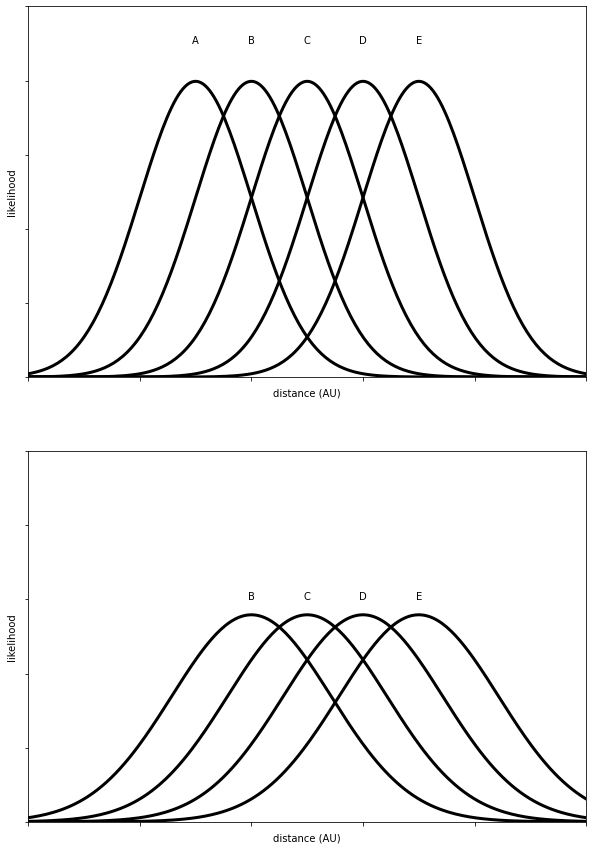

In [10]:

sigma = 1
mu = 1
decay = 0.7
width = 3.0 # linewidth
x = np.linspace(mu - 5*sigma, mu + 15*sigma, 500)
posns = np.array([0,1,2,3,4])
#labels = ('1','2','3','4','5')
labels = ('A','B','C','D','E')
label_arr = ['A','B','C','D','E']

fig, ax = plt.subplots(2, figsize=(10,15))


#plt.xticks(posns, labels)
for i in range(5):
    ax[0].text(i+1,0.45,label_arr[i],horizontalalignment='center')
    
for mu in  [1,2,3,4,5]:
    ax[0].set_ylim((0,0.5))
    ax[0].set_xlim(-2,8.0)
    ax[0].set_ylabel('likelihood')
    ax[0].set_xlabel('distance (AU)')
    ax[0].set_xticklabels([])
    ax[0].set_yticklabels([])
    ax[0].plot(x, stats.norm.pdf(x, mu, sigma), 'k-',linewidth=width)



# now items 3,4,5 after decay
#sigma = sigma/(decay * decay) # 2 item's decay
sigma = sigma/decay 
for i in [1,2,3,4]:
    ax[1].set_xticklabels([])
    ax[1].set_yticklabels([])
    ax[1].text(i+1,0.3,label_arr[i],horizontalalignment='center')
    
for mu in  [2,3,4,5]:
    ax[1].set_ylim((0,0.5))
    ax[1].set_xlim(-2,8.0)
    ax[1].set_ylabel('likelihood')
    ax[1].set_xlabel('distance (AU)')
    ax[1].plot(x, stats.norm.pdf(x, mu, sigma), 'k-',linewidth=width)
plt.show()

<ipython-input-11-0859b897b955>:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i].set_yticks([], [])
<ipython-input-11-0859b897b955>:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax[i].set_xticks([], [])


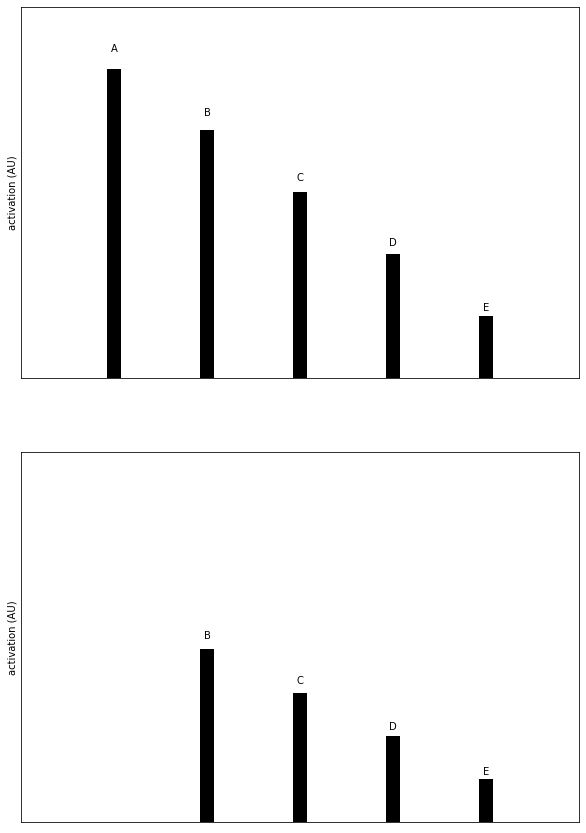

In [11]:
gradient = np.array([5,4,3,2,1]) # this determines the order that the particle represents
decay = 0.7
labels = ['x','A','B','C','D','E'] # no idea why it eats the first label
fig, ax = plt.subplots(2, figsize=(10,15))

plt.ylim((0,1.0))


posns = [0,1,2,3,4]
labels = ['A','B','C','D','E']
#plt.xticks(posns, labels)

for i in range(2):

    ax[i].set_yticks([], []) 
    ax[i].set_xticks([], []) 
    ax[i].set_ylabel('activation (AU)', rotation='90')
    ax[i].set_ylim((0,6))
    ax[i].set_xlim(-1,5.0)
 #   ax[i].set_xlabel('item')
#    ax[i].set_xticklabels(labels[i:])
    rects = ax[i].bar(np.arange(len(gradient)),gradient, color='black', width = 0.15)
    for idx, rect  in enumerate(rects): # add labels above bars
        if i == 1 and idx == 0: # skip the 'A' for the second plot
            continue
        height = rect.get_height()
        ax[i].text(rect.get_x() + rect.get_width()/2., 1.05*height,
                labels[idx], ha='center', va='bottom')


    gradient[i] = 0 # suppress item
    gradient = gradient * decay 
plt.show()    